In [81]:
import pandas as pd
import numpy as np

In [82]:
lab_raw_df = pd.read_csv("./data/lab_raw_selected_col.csv")
lab_raw_df

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME
0,9B640BB0F12164A96A96CFBAF897F2695D51856F9A27B5...,2DEBCE41A0C6A5DDD87D0109401204A5,厭氧結果,1080318,1757
1,9B640BB0F12164A9FF7B7AEAC916222CD57D7A02B7D339...,5FBF46C26A359B89922F10CA9AE98543,厭氧結果,1080528,1400
2,9B640BB0F12164A9E95D2EDFD3727F3C5DBD8D82043E02...,C3E651E4C6E23A77EC60C2FACCC6912C,Aerobic Culture(Tip)(嗜氧培養),1080326,1324
3,9B640BB0F12164A9DB15DEB40C7F3D91CAD3CCC475C05C...,2672515E9BD516826301865E680AF739,Urine culture(中段尿)(尿液培養),1080423,1201
4,9B640BB0F12164A9CD6D2265800224755CE2FB52B69123...,69D62955F57C347B05DE47B495661CCF,TB culture(sputum)(結核菌培養),1080606,1400
...,...,...,...,...,...
181579,9B640BB0F12164A91627195CD11C93253282991BC93017...,ED7359EEF4368C19C0C0A16BE96EDACD,Sputum culture(痰液培養),1080309,1035
181580,9B640BB0F12164A920EEECC8FDFC68B028C9DB6B23B5EA...,11DCC4F18F792D64F529AA65766A8729,Aerobic Culture(Tip)(嗜氧培養),1080510,1336
181581,9B640BB0F12164A93A359A81AC48DD501A2CBE09D9BE95...,E9EEF5C525C8523E29BC4E98F285F522,Sputum culture(痰液培養),1080403,1209
181582,9B640BB0F12164A9096B09ED518DFDB9F05AC10495630C...,C07264728C1F1E929106FDDD587296AF,Sputum culture(痰液培養),1080403,1210


In [83]:
search_terms = ["Sputum culture", "Urine culture", "Blood culture"]

# Filter rows that contain any of the search terms in the O_ITEM_NAME column (substring match)
lab_selected_rows = lab_raw_df[lab_raw_df['O_ITEM_NAME'].str.contains('|'.join(search_terms), case=False, na=False)]

# Display the matching rows
lab_selected_rows

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME
3,9B640BB0F12164A9DB15DEB40C7F3D91CAD3CCC475C05C...,2672515E9BD516826301865E680AF739,Urine culture(中段尿)(尿液培養),1080423,1201
5,9B640BB0F12164A9B83EE3E26EC9C75B060C95560C33BC...,000AE507465FC0EBB002364E139FA1BE,Sputum culture(痰液培養),1080314,1403
10,9B640BB0F12164A91987A6E95D0A0CCDBEF87128E20295...,9580A9C448DE6000DF89B98034FE53B2,Sputum culture(痰液培養),1080330,1012
11,9B640BB0F12164A90490645932B821E17264F90D33336A...,7B4B763BAEEC032CC1A269B2414EA0DB,Urine culture(中段尿)(尿液培養),1080323,1751
14,9B640BB0F12164A9BCD91CE7679A43483E062B360A1A57...,38946811836D1B9B026C13CD0DDDCE98,Blood culture第二套(血液培養),1080723,1538
...,...,...,...,...,...
181576,9B640BB0F12164A9D27E35938B5E0AFE0A442712CDC509...,06482455D2AF8C6924A5BD4702B924D8,Sputum culture(痰液培養),1080304,1132
181578,9B640BB0F12164A9C0FC6C5200258CCEDB58154BED8925...,3F47B215FE018A42F03890261483B562,Blood culture第二套(血液培養),1080326,1047
181579,9B640BB0F12164A91627195CD11C93253282991BC93017...,ED7359EEF4368C19C0C0A16BE96EDACD,Sputum culture(痰液培養),1080309,1035
181581,9B640BB0F12164A93A359A81AC48DD501A2CBE09D9BE95...,E9EEF5C525C8523E29BC4E98F285F522,Sputum culture(痰液培養),1080403,1209


In [84]:
mapping = {
    "Sputum culture": "Sputum culture",
    "Urine culture": "Urine culture",
    "Blood culture": "Blood culture"
}

# Function to map substrings to the new column
def map_culture_type(item_name):
    for key in mapping.keys():
        if key.lower() in item_name.lower():
            return mapping[key]
    return None

# Apply the mapping function to create a new column
lab_selected_rows['Culture_Type'] = lab_selected_rows['O_ITEM_NAME'].apply(map_culture_type)
lab_selected_rows = lab_selected_rows.drop_duplicates().sort_values(by='CHR_NO', ascending=True)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\1480812751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_selected_rows['Culture_Type'] = lab_selected_rows['O_ITEM_NAME'].apply(map_culture_type)


In [85]:
lab_selected_rows.to_csv("./data/lab_selected_rows.csv", index=False)

In [86]:
unique_pairs_no = lab_selected_rows[['CHR_NO', 'FEE_NO']].drop_duplicates().sort_values(by='CHR_NO', ascending=True)
unique_pairs_no

,CHR_NO,FEE_NO
24175,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C
40418,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68
40817,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957
4981,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1
29263,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802
...,...,...
21879,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02
26876,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201
130333,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170
39462,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67


In [87]:
unique_pairs_no.to_csv("./data/lab_unique_CHR_FEE.csv", index=False)

In [88]:
unique_CHR_no = lab_selected_rows[['CHR_NO']].drop_duplicates().sort_values(by='CHR_NO', ascending=True)
unique_CHR_no

,CHR_NO
24175,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...
40418,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...
40817,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...
4981,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...
29263,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...
...,...
21879,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...
26876,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...
130333,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...
39462,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...


In [89]:
unique_CHR_no.to_csv("./data/lab_unique_CHR.csv", index=False)


# Merge csv into one table
- 'ipd_basic.csv': CHR_NO, FEE_NO, ICD10_CODE1, ICD10_CODE2, ICD10_CODE3, ICD10_CODE4, ICD10_CODE5, ICD10_CODE6, ICD10_CODE7, ICD10_CODE1_OUT, ICD10_CODE2_OUT, ICD10_CODE3_OUT, ICD10_CODE4_OUT, ICD10_CODE5_OUT, ICD10_CODE6_OUT, ICD10_CODE7_OUT, ICD10_CODE8_OUT
- 'ipd_basic_unique_pair.csv': CHR_NO, FEE_NO
- 'lab_raw.csv': index, CHR_NO, FEE_NO, TUBE_NO, WORK_NO, L_DATE, L_TIME, B_DATE, B_TIME, R_DATE, R_TIME, C_DATE, C_TIME, EXPER_KIND, FEE_CODE, O_ITEM, O_ITEM_NAME, O_ITEM_RESULT, MICROORGANISM_SEQ, MICROORGANISM, MICROORGANISM_NOTE, AST_R_ITEM, AST_NAME, AST_RESULT
- 'lab_raw_selected_col.csv': CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME
- 'lab_selected_rows.csv': CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, Culture_Type
- 'lab_unique_CHR_FEE.csv': CHR_NO, FEE_NO
- 'ur_order.csv': CHR_NO, FEE_NO, BEGIN_DATE, BEGIN_TIME, MED_CODE

In [90]:
import os
dir_name = os.listdir("./data/")
dir_name

['ipd_basic.csv',
 'ipd_basic_unique_pair.csv',
 'lab_raw.csv',
 'lab_raw_selected_col.csv',
 'lab_selected_rows.csv',
 'lab_unique_CHR.csv',
 'lab_unique_CHR_FEE.csv',
 'ur_order.csv',
 'ur_order_lab_merge.csv']

In [91]:
col_schema_list = []
for dir in dir_name:
    df = pd.read_csv(f"./data/{dir}")
    col_schema_list.append(df.columns)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\2588645605.py:3: DtypeWarning: Columns (18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"./data/{dir}")


In [92]:
for col_schema in col_schema_list:
    
    for col in col_schema:
        print(col, end=", ")
    print()

CHR_NO, FEE_NO, ICD10_CODE1, ICD10_CODE2, ICD10_CODE3, ICD10_CODE4, ICD10_CODE5, ICD10_CODE6, ICD10_CODE7, ICD10_CODE1_OUT, ICD10_CODE2_OUT, ICD10_CODE3_OUT, ICD10_CODE4_OUT, ICD10_CODE5_OUT, ICD10_CODE6_OUT, ICD10_CODE7_OUT, ICD10_CODE8_OUT, 
CHR_NO, FEE_NO, 
index, CHR_NO, FEE_NO, TUBE_NO, WORK_NO, L_DATE, L_TIME, B_DATE, B_TIME, R_DATE, R_TIME, C_DATE, C_TIME, EXPER_KIND, FEE_CODE, O_ITEM, O_ITEM_NAME, O_ITEM_RESULT, MICROORGANISM_SEQ, MICROORGANISM, MICROORGANISM_NOTE, AST_R_ITEM, AST_NAME, AST_RESULT, 
CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, 
CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, Culture_Type, 
CHR_NO, 
CHR_NO, FEE_NO, 
CHR_NO, FEE_NO, BEGIN_DATE, BEGIN_TIME, MED_CODE, 
Unnamed: 0, CHR_NO, FEE_NO, BEGIN_DATE, BEGIN_TIME, MED_CODE, 


In [93]:
ipd_basic_df = pd.read_csv(f'./data/ipd_basic.csv')
ipd_basic_unique_pair_df = pd.read_csv(f'./data/ipd_basic_unique_pair.csv')
lab_selected_rows_df = pd.read_csv(f'./data/lab_selected_rows.csv')
lab_unique_CHR_FEE_df = pd.read_csv(f'./data/lab_unique_CHR_FEE.csv')
ur_order_df = pd.read_csv(f'./data/ur_order.csv')


In [94]:
ipd_basic_df

,CHR_NO,FEE_NO,ICD10_CODE1,ICD10_CODE2,ICD10_CODE3,ICD10_CODE4,ICD10_CODE5,ICD10_CODE6,ICD10_CODE7,ICD10_CODE1_OUT,ICD10_CODE2_OUT,ICD10_CODE3_OUT,ICD10_CODE4_OUT,ICD10_CODE5_OUT,ICD10_CODE6_OUT,ICD10_CODE7_OUT,ICD10_CODE8_OUT
0,9B640BB0F12164A95670F8A096371E6BF7424FA4B78878...,21E4C06CD7268F119FE13413C786D062,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9B640BB0F12164A9839B5DF2482A26D0AEE754AD6577BC...,ED9090C263C8014721660C4C9D116DF9,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9B640BB0F12164A9849AE48368475214FD4690BDC5288C...,8FBA452F92AA457066F4F278F6DA2E05,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9B640BB0F12164A97291CC01C45ACE71F77C616691CDA0...,7AF4542F7F73B2167EDB88A292325FB1,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9B640BB0F12164A9EDEE77B06E68E787A979662A606AC8...,5635C0D7E82181F46A6B10E052611A0E,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,9B640BB0F12164A9D287622D9A9BD7B356B312A048AA42...,758863864F830B4A47B65488160B333B,A41.9,R50.9,E11.65,NaN,NaN,NaN,NaN,A41.9,N13.6,J96.10,Z99.11,Z93.0,N17.9,S06.6X9S,S06.379S
511,9B640BB0F12164A9A5269B331BCDA1F3D98CC34B095B72...,942A2E7719D058E5C3A8C993C3A611CE,D64.9,K27.9,M10.9,NaN,NaN,NaN,NaN,I13.11,N18.6,D63.1,J18.9,J96.00,A41.9,N39.0,B96.89
512,9B640BB0F12164A9301AD259F2F9E47401CE7067545211...,3CD671BBF9CC305E3AFB9F0CD1617630,A41.9,C16.8,I95.9,NaN,NaN,NaN,NaN,I26.99,R57.8,I27.2,A41.9,K65.9,C16.8,C77.2,C78.5
513,9B640BB0F12164A9E3B7C32FA55ACB916CB8D01E4B613D...,51D1AE077A44074FB536417CBCFFF459,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Assuming ipd_basic_df and lab_unique_CHR_FEE_df are your two DataFrames

# Intersection: rows that are present in both DataFrames
intersection_df = pd.merge(ipd_basic_df, lab_unique_CHR_FEE_df, on=['CHR_NO', 'FEE_NO'], how='inner')

# Not Intersection: rows that are present in one DataFrame but not the other (both ways)
not_intersection_df = pd.merge(ipd_basic_df, lab_unique_CHR_FEE_df, on=['CHR_NO', 'FEE_NO'], how='outer', indicator=True)
not_intersection_df = not_intersection_df[not_intersection_df['_merge'] != 'both']

# Calculate the counts
intersection_count = len(intersection_df)
not_intersection_count = len(not_intersection_df)

# Display the counts
print(f"Intersection count: {intersection_count}")
print(f"Not Intersection count: {not_intersection_count}")

Intersection count: 408
Not Intersection count: 3617


In [96]:
# Assuming ur_order_df and lab_selected_rows_df are your two DataFrames

# Intersection: rows that are present in both DataFrames
intersection_df = pd.merge(ur_order_df, lab_selected_rows_df, on=['CHR_NO', 'FEE_NO'], how='inner')

# Not Intersection: rows that are present in one DataFrame but not the other (both ways)
not_intersection_df = pd.merge(ur_order_df, lab_selected_rows_df, on=['CHR_NO', 'FEE_NO'], how='outer', indicator=True)
not_intersection_df = not_intersection_df[not_intersection_df['_merge'] != 'both']

# Calculate the counts
intersection_count = len(intersection_df)
not_intersection_count = len(not_intersection_df)

# Display the counts
print(f"Intersection count: {intersection_count}")
print(f"Not Intersection count: {not_intersection_count}")

Intersection count: 20975
Not Intersection count: 3871


In [97]:
ur_order_lab_merge_df = intersection_df
ur_order_lab_merge_df.to_csv("./data/ur_order_lab_merge.csv")
ur_order_lab_merge_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080423,951,Blood culture
1,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Urine culture(單次導尿)(尿液培養),1080502,1137,Urine culture
2,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080502,1357,Sputum culture
3,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第一套(血液培養),1080423,951,Blood culture
4,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080415,1251,Sputum culture
...,...,...,...,...,...,...,...,...,...
20970,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080525,1219,Sputum culture
20971,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080516,1347,Sputum culture
20972,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080316,1553,Sputum culture
20973,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture


In [98]:
ur_order_lab_merge_df = intersection_df
ur_order_lab_merge_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080423,951,Blood culture
1,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Urine culture(單次導尿)(尿液培養),1080502,1137,Urine culture
2,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080502,1357,Sputum culture
3,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第一套(血液培養),1080423,951,Blood culture
4,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080415,1251,Sputum culture
...,...,...,...,...,...,...,...,...,...
20970,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080525,1219,Sputum culture
20971,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080516,1347,Sputum culture
20972,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080316,1553,Sputum culture
20973,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture


convert date into standard date

In [109]:
from datetime import datetime

# Helper function to convert date and time to datetime format
def convert_to_datetime(yymmdd, time_in_sec):
    try:
        year = (yymmdd // 10000) + 1900  # Assuming '108' represents the year 2008
        month = (yymmdd % 10000) // 100
        day = yymmdd % 100
        hr = time_in_sec // 100
        minute = time_in_sec % 100
        return datetime(year, month, day, hr, minute)
    except ValueError:
        return pd.NaT

ur_order_lab_merge_format_date_df = ur_order_lab_merge_df
# Convert BEGIN_DATE and BEGIN_TIME to datetime
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = ur_order_lab_merge_format_date_df.apply(lambda row: convert_to_datetime(row['BEGIN_DATE'], row['BEGIN_TIME']), axis=1)

# Convert C_DATE and C_TIME to datetime
ur_order_lab_merge_format_date_df['C_DATETIME'] = ur_order_lab_merge_format_date_df.apply(lambda row: convert_to_datetime(row['C_DATE'], row['C_TIME']), axis=1)

# Calculate the difference between C_DATETIME and BEGIN_DATETIME
ur_order_lab_merge_format_date_df['Time_Difference'] = ur_order_lab_merge_format_date_df['C_DATETIME'] - ur_order_lab_merge_format_date_df['BEGIN_DATETIME']

# Display the updated DataFrame
# print(ur_order_lab_merge_format_date_df[['BEGIN_DATETIME', 'C_DATETIME', 'Time_Difference']])
ur_order_lab_merge_format_date_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,BEGIN_DATETIME,C_DATETIME,Time_Difference
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080423,951,Blood culture,2008-03-28 22:53:00,2008-04-23 09:51:00,25 days 10:58:00
1,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Urine culture(單次導尿)(尿液培養),1080502,1137,Urine culture,2008-03-28 22:53:00,2008-05-02 11:37:00,34 days 12:44:00
2,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080502,1357,Sputum culture,2008-03-28 22:53:00,2008-05-02 13:57:00,34 days 15:04:00
3,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第一套(血液培養),1080423,951,Blood culture,2008-03-28 22:53:00,2008-04-23 09:51:00,25 days 10:58:00
4,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Sputum culture(痰液培養),1080415,1251,Sputum culture,2008-03-28 22:53:00,2008-04-15 12:51:00,17 days 13:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
20970,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080525,1219,Sputum culture,2008-05-14 10:11:00,2008-05-25 12:19:00,11 days 02:08:00
20971,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Sputum culture(痰液培養),1080516,1347,Sputum culture,2008-05-14 10:11:00,2008-05-16 13:47:00,2 days 03:36:00
20972,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080316,1553,Sputum culture,2008-03-09 09:04:00,2008-03-16 15:53:00,7 days 06:49:00
20973,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-09 09:04:00,2008-03-14 14:06:00,5 days 05:02:00


In [135]:
# Convert columns to appropriate datetime types
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['BEGIN_DATETIME'])
ur_order_lab_merge_format_date_df['C_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['C_DATETIME'])
ur_order_lab_merge_format_date_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_df['Time_Difference'])

# Define the threshold (e.g., 10 days)
high_threshold = pd.Timedelta(days=2)
low_threshold = pd.Timedelta(days=0)

# Filter out rows where Time_Difference is greater than the threshold
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]

# Display the filtered DataFrame
ur_order_lab_merge_format_date_filtered_df


C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\1489597608.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]


,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,BEGIN_DATETIME,C_DATETIME,Time_Difference
14,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,1081204,946,ICEF,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-04 09:46:00,2008-12-05 14:12:00,1 days 04:26:00
23,9B640BB0F12164A900C9CAA5EB5A865F81DE655071E54E...,4CBC3996F2BE1593F7101676E746E785,1070715,1614,IFURO,Urine culture(中段尿)(尿液培養),1070717,1434,Urine culture,2007-07-15 16:14:00,2007-07-17 14:34:00,1 days 22:20:00
38,9B640BB0F12164A900F35BCF1CB58C629BB6405C03F9E4...,02BB3DB7B6A95D6FD27694D4C63C2CDC,1080320,1608,ICEF,Urine culture(中段尿)(尿液培養),1080322,1231,Urine culture,2008-03-20 16:08:00,2008-03-22 12:31:00,1 days 20:23:00
79,9B640BB0F12164A9015D0F80218D7F4CBE505000781CB0...,ABCF6DCDE3339D58BD88B35129D10A73,1081129,820,IPIP-2,Blood culture第一套(血液培養),1081130,859,Blood culture,2008-11-29 08:20:00,2008-11-30 08:59:00,1 days 00:39:00
124,9B640BB0F12164A901B07BAC47748ED2ABA49603332076...,21B223B52A522DF7576F9E086227E5DD,1070514,1149,ICRA250,Sputum culture(痰液培養),1070515,1124,Sputum culture,2007-05-14 11:49:00,2007-05-15 11:24:00,0 days 23:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...
20864,9B640BB0F12164A9FE753DE2948B479C0D8FD037DB64BA...,9D770DAF34131448D97D96C39B39CD90,1080214,1612,IPIP-2,Sputum culture(痰液培養),1080215,1155,Sputum culture,2008-02-14 16:12:00,2008-02-15 11:55:00,0 days 19:43:00
20868,9B640BB0F12164A9FE753DE2948B479C0D8FD037DB64BA...,9D770DAF34131448D97D96C39B39CD90,1080214,1612,IPIP-2,Sputum culture(痰液培養),1080215,1156,Sputum culture,2008-02-14 16:12:00,2008-02-15 11:56:00,0 days 19:44:00
20896,9B640BB0F12164A9FF1DEE626D5C65C914EDD463D940AB...,65A07AEC89A4FD372C0BE624E300828F,1070716,1610,ICEF,Sputum culture(痰液培養),1070718,1012,Sputum culture,2007-07-16 16:10:00,2007-07-18 10:12:00,1 days 18:02:00
20900,9B640BB0F12164A9FF1DEE626D5C65C914EDD463D940AB...,65A07AEC89A4FD372C0BE624E300828F,1070716,1610,ICEF,Urine culture(中段尿)(尿液培養),1070718,1025,Urine culture,2007-07-16 16:10:00,2007-07-18 10:25:00,1 days 18:15:00


In [126]:
# import matplotlib.pyplot as plt
# import pandas as pd
# # Plot the distribution of Time_Difference
# plt.figure(figsize=(10, 6))
# plt.hist(ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60*60*24), bins=10, color='blue', alpha=0.7)
# plt.title('Distribution of Time Difference (in days)')
# plt.xlabel('Time Difference (days)')
# plt.ylabel('Frequency')
# plt.grid(True)

# # Show the plot
# plt.show()

In [134]:
import matplotlib.pyplot as plt
def draw_distribution(df):
    # Plot the distribution of Time_Difference in hours with continuous bins
    plt.figure(figsize=(10, 6))
    plt.hist(df['Time_Difference_Hours'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Time Difference (in hours)')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Frequency')
    plt.grid(True)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\2989144534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\2989144534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_second

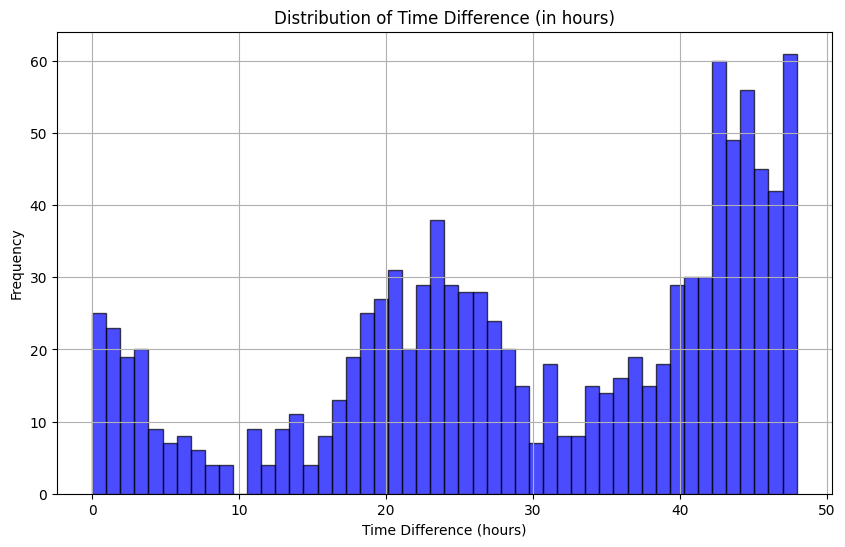

In [136]:
# Convert Time_Difference to timedelta
ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])

# Convert timedelta to hours for plotting
ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60 * 60)

draw_distribution(ur_order_lab_merge_format_date_filtered_df)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\3140567553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\3140567553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_second

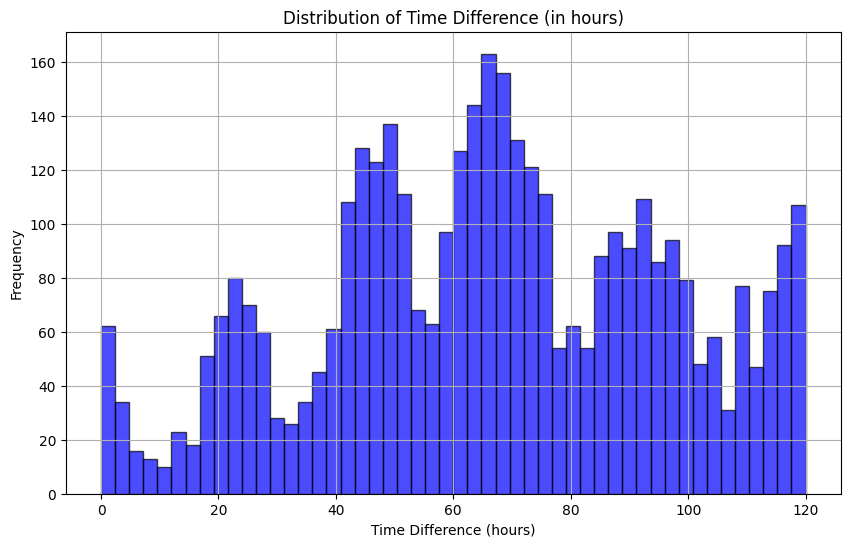

In [129]:
# Convert Time_Difference to timedelta
ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])

# Convert timedelta to hours for plotting
ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60 * 60)
draw_distribution(ur_order_lab_merge_format_date_filtered_df)


if the CHR_NO and FEE_NO are unique on the dataset

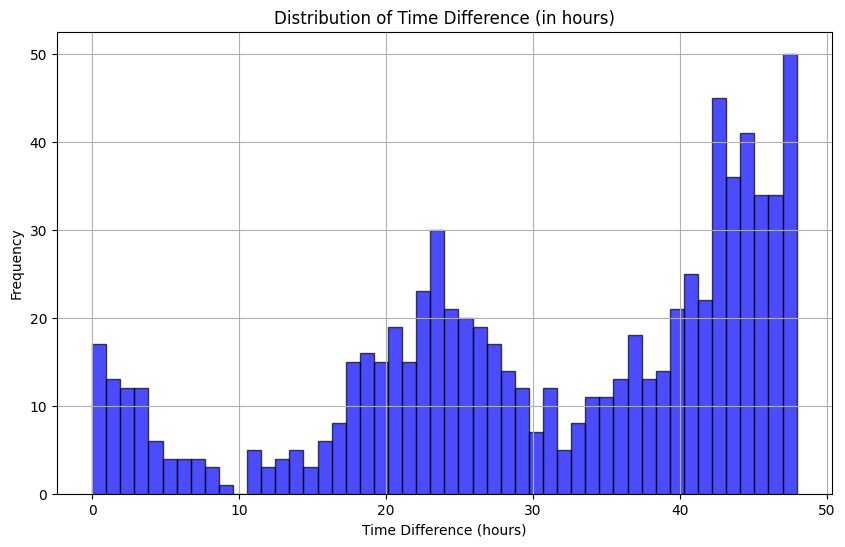

In [137]:
ur_order_lab_merge_format_date_filtered_df_unique = ur_order_lab_merge_format_date_filtered_df.drop_duplicates(subset=['CHR_NO', 'FEE_NO'])
draw_distribution(ur_order_lab_merge_format_date_filtered_df_unique)
